# 2110443 - Computer Vision (2018/1)
## Lab 5 - Simple Object Recognition
In this lab, we will learn to use useful  handcrafted features to recognize objects in the provied images. This notebook includes both coding and written questions. Please hand in this notebook file with all outputs and your answer

<b>Collaboration is encouraged in this course.</b> You must turn in <b>your own write ups</b> of all problems. If you collaborate with others, you must put the names and ids of the students you worked with in below block.

Collaboration List:
- ...
- ...

In [1]:
import cv2
import math
import time
import numpy as np
import random as rng
from matplotlib import pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display, HTML,clear_output
%matplotlib inline

## Assignment 1 - A Letter from Nowhere (Special Assignment)
We got multiple mysterious letters from nowhere. Here is one of them. As a computer engineering student, can you decipher this letter before unthinkable things happen? Your task is to write a program to <b>automate deciphering this image.</b> We hope that everything is going well after you decipher this secret. Please hand in the <b>image recognition output (put the recognition result on image)</b> and decoded message. 

<b>Basic Guidance:<b>
1. Extract each digit from image & filter out the outlier.
2. Group the recognized results into digit groups.
3. Use <b>your own designed feature</b> to classify between 0 and 1 
4. Write a function to decrypt them
 
<b>Hints:</b>
- You can use knowledge from previous lecture to improve the segmentation result by apply <b>?</b> on input image
- Specific threshold based on shape properties or simple morphological operations can be use to keep only potential contours
- This <a href="https://docs.opencv.org/3.4.2/d7/d4d/tutorial_py_thresholding.html">page</a> <b>may</b> contains useful information!
- What is the different feature between non-overlaped and overlapped stroke?

In [2]:
### Describe how your algorithm work here (Thai or English).
'''
1. ..
2. ..
..
'''

'\n1. ..\n2. ..\n..\n'

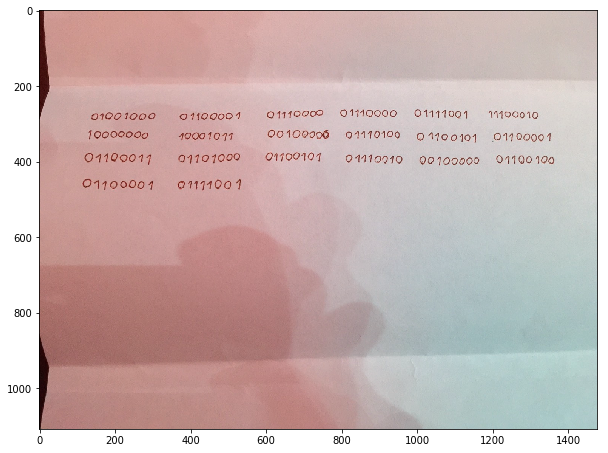

/anaconda3/envs/env1/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in double_scalars
/anaconda3/envs/env1/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars
/anaconda3/envs/env1/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in multiply


172 165.0
(1108, 1478)


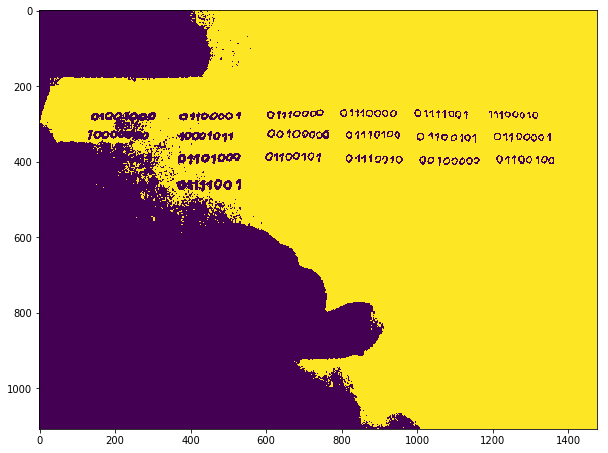

In [3]:
### Letter Image in "assets/Lab5-LetterFromNowhere.jpg" ###
def imshow(image,_figsize = (10,10)):
    plt.figure(figsize=_figsize)
#     img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     img = image.copy()
    plt.imshow(image)
    plt.show()
imgLetter = cv2.imread("assets/Lab5-LetterFromNowhere.jpg")
im_gray = cv2.cvtColor(imgLetter, cv2.COLOR_BGR2GRAY)
imshow(imgLetter)
blur = cv2.GaussianBlur(im_gray,(5,5),0)
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,200,cv2.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )
print(otsu.shape)
imshow(otsu)
### FILL HERE ###

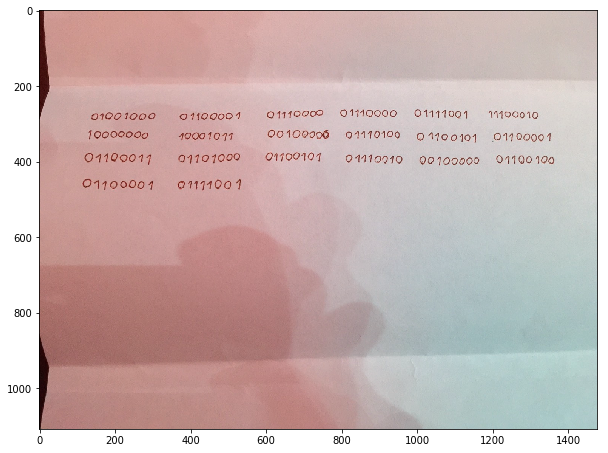

In [4]:
def imshow(image,_figsize = (10,10)):
    plt.figure(figsize=_figsize)
#     img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
#     img = image.copy()
    plt.imshow(image)
    plt.show()
imgLetter = cv2.imread("assets/Lab5-LetterFromNowhere.jpg")
im_gray = cv2.cvtColor(imgLetter, cv2.COLOR_BGR2GRAY)
imshow(imgLetter)



In [6]:
def openAndCloseMorph(thresh1,thresh2):
    ret,th1 = cv2.threshold(im_gray,thresh1,thresh2,cv2.THRESH_BINARY)
    th3 = cv2.adaptiveThreshold(im_gray,thresh1,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,thresh2)
#     plt.figure(figsize=(10,10))
#     plt.imshow(th1)
#     plt.show()

    plt.figure(figsize=(10,10))
    plt.imshow(th3)
    plt.show()

interact(openAndCloseMorph, thresh1=widgets.IntSlider(min=0,max=255,step=1,value=1), 
         thresh2=widgets.IntSlider(min=0,max=255,step=1,value=1), 
);

interactive(children=(IntSlider(value=1, description='thresh1', max=255), IntSlider(value=1, description='thre…

In [90]:
op_im = cv2.adaptiveThreshold(im_gray,164,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,5)

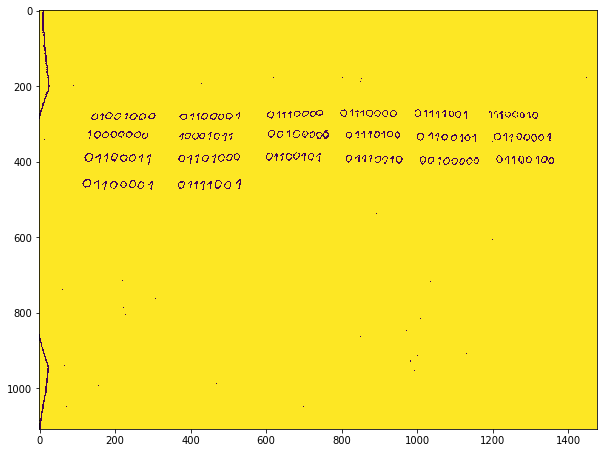

In [91]:
op_im = cv2.medianBlur(op_im,3)
imshow(op_im)

In [92]:
def iou(boxA, boxB, thresh):
#     determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
 
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
#     print(interArea)
 
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
 
    iou = interArea / boxAArea
#     print(iou)
    if(iou > thresh): return True
    return False

150
index exceed
no change


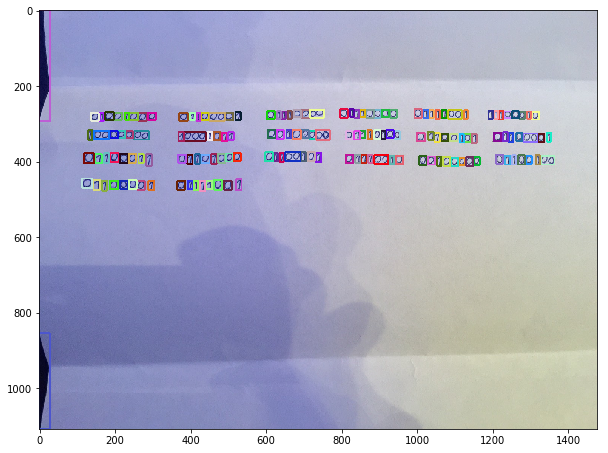

In [93]:
def doStuff(im):
    inputImageGray = im
    sobelXOutput_64F = cv2.Sobel(inputImageGray,cv2.CV_64F,1,0,ksize=3)
    sobelXOutput_64F = np.uint8(np.absolute(sobelXOutput_64F))
    sobelYOutput_64F = cv2.Sobel(inputImageGray,cv2.CV_64F,0,1,ksize=3)
    sobelYOutput_64F = np.uint8(np.absolute(sobelYOutput_64F))
    sobelXYOutput = sobelXOutput_64F + sobelYOutput_64F
    sobelXYOutput = np.uint8(sobelXYOutput > 50)
    _, rbcContours, _ = cv2.findContours(sobelXYOutput, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bbs = []
    bbs_final = []
    for rcbContourIdx in range(len(rbcContours)):
        x, y, w, h = cv2.boundingRect(rbcContours[rcbContourIdx])
        if(w < 10 or h < 10): continue
        bb = [x,y,x+ w, y+h]
    #     print(bb)
        bbs.append(bb)
    print(len(bbs))

    while(1):
        change = False
        index = 0
        while(1):
            for j in range(len(bbs)):
                if(index == j): continue
                bb1 = bbs[index]
                bb2 = bbs[j]
                if(iou(bb1,bb2,0.5)):
    #                 print("yue")
                    change = True
                    area1 = (bb1[2] - bb1[0]) * (bb1[3] - bb1[1])
                    area2 = (bb2[2] - bb2[0]) * (bb2[3] - bb2[1])  
                    if(area1 > area2):
                        del(bbs[j])
                    else:
                        del(bbs[index])
                    break
            index += 1    
            if(index >= len(bbs)): 
                print('index exceed')
                break
    #         if(~change): break

        if(~change): 
            print('no change')
            break
        else:
            print('is change')
    rbcContourImage = imgLetter.copy()

    for bb in bbs:

        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.rectangle(rbcContourImage,(bb[0],bb[1]),(bb[2],bb[3]),color,3)
    rbcContourImage = cv2.cvtColor(rbcContourImage,cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10,10))
    plt.imshow(rbcContourImage)
    plt.show()
    return bbs
bbs = doStuff(op_im)

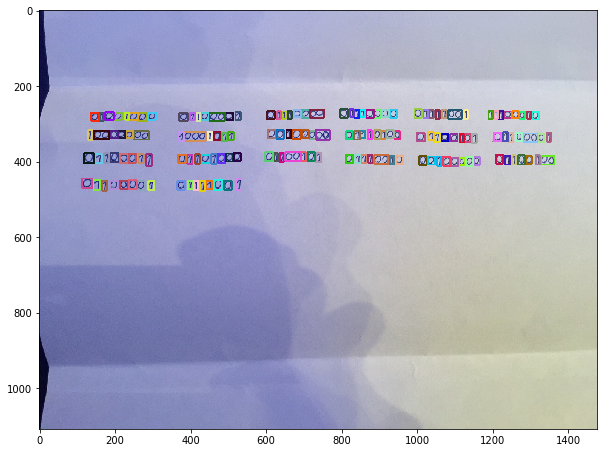

In [94]:
def drawContours(bbs):
    contourImage = imgLetter.copy()
    for bb in bbs:
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.rectangle(contourImage,(bb[0],bb[1]),(bb[2],bb[3]),color,3)
    contourImage = cv2.cvtColor(contourImage,cv2.COLOR_BGR2RGB)
    imshow(contourImage)

#remove bb with larger than majority and remove noises
mean_area = 0
for bb in bbs:
    area = (bb[2] - bb[0]) * (bb[3] - bb[1])
    mean_area += area
mean_area/=len(bbs)
index = 0
while(1):
    bb = bbs[index]
    area = (bb[2] - bb[0]) * (bb[3] - bb[1])
    if area > mean_area * 3 or area < 10:
        del bbs[index]
    else:
        index += 1
    if index == len(bbs): break
        
drawContours(bbs)

In [133]:
import math
def define(bb):
    width = bb[2] - bb[0]
    height = bb[3] - bb[1]
    if(height >= width * 1.5):
        return "1"
    amount = math.ceil(width // (height * 0.7))
    return "0" * amount

In [ ]:
for bb in bbs:
    img = imgLetter.copy()
    small_bb = imgLetter[bb[1]:bb[3],bb[0]:bb[2]]
    imshow(small_bb,(3,3))
    print(define(bb))

In [135]:
# code modified from https://stackoverflow.com/questions/38805462/how-to-sort-contours-left-to-right-while-going-top-to-bottom-using-python-and?rq=1
# sort all rect by their y
bbs.sort(key=lambda b: b[1])
# initially the line bottom is set to be the bottom of the first rect
line_bottom = bbs[0][3]
line_begin_idx = 0
for i in range(len(bbs)):
    # when a new box's top is below current line's bottom
    # it's a new line
    if bbs[i][1] > line_bottom:
        # sort the previous line by their x
        bbs[line_begin_idx:i] = sorted(bbs[line_begin_idx:i], key=lambda b: b[0])
        line_begin_idx = i
    # regardless if it's a new line or not
    # always update the line bottom
    line_bottom = max(bbs[i][3], line_bottom)
# sort the last line
bbs[line_begin_idx:] = sorted(bbs[line_begin_idx:], key=lambda b: b[0])

01001000 01100001 01110000 01100000 01111001 11100010 10000000 10001011 00100000 01110100 00100101 01100001 00100011 01101000 01100101 01110010 00100000 01100100 01100001 01111001


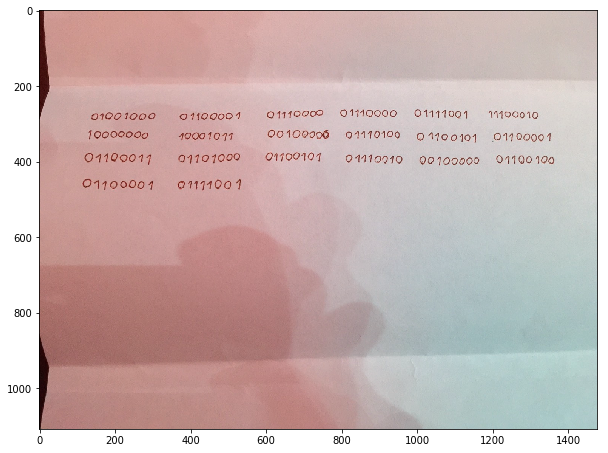

In [138]:
output = ""
for bb in bbs:
#     img = imgLetter.copy()
#     small_bb = imgLetter[bb[1]:bb[3],bb[0]:bb[2]]
    output += define(bb)
index = 0
counter = 0
output_segmented = output[0]
for i in range(1,len(output)):
    if i % 8 == 0:
        output_segmented += " " + output[i]
    else:
        output_segmented += output[i]
# while(1):
#     counter += 1
#     print(index)
#     if(counter == 8):
#         output = output[0:index] + " " + output[index:]
#         index += 1
#         counter = 0
#     if index >= len(output):
#         break
# print(output)
print(output_segmented)
imshow(imgLetter)

## Maker Based Segmentation

In this section, we will learn how to apply a classic segmentation algorithm named <b>watershed</b>. This algorithm can be used to detect and extract objects in images that are <b>touching and/or overlapping</b> (like RBC in previous Lab!).

Assume that we want to build an application to count coins value from the following image. First of all, we need to segment each coins in to a individual connected component.

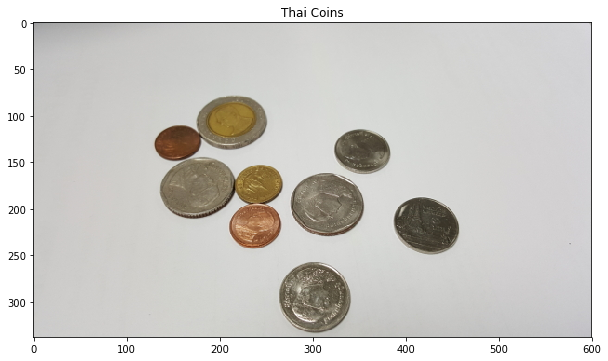

In [79]:
# sampleCoinImage = cv2.imread("assets/Lab5-SampleCoins.jpg")
sampleCoinImage = cv2.imread("assets/Lab5-SampleCoins.jpg")
sampleCoinGray = cv2.cvtColor(sampleCoinImage,cv2.COLOR_BGR2GRAY)
tempImage = cv2.cvtColor(sampleCoinImage,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title("Thai Coins")
plt.imshow(tempImage)
plt.show()

The following blocks try to use edge information from previous lecture to seperate coins image into individual coin.
Standard Sobel operator is used to extract edge information and only strong edge pixels are kept based on defined threshold. Try to adjust the edge threshold value to seperate each coin from others

In [251]:
def extractSobelEdge(thresholdEdgeVal):
    sobelX = np.uint8(np.absolute(cv2.Sobel(sampleCoinGray,cv2.CV_64F,1,0,ksize=3)))
    sobelY = np.uint8(np.absolute(cv2.Sobel(sampleCoinGray,cv2.CV_64F,0,1,ksize=3)))
    sobelXY = (sobelX + sobelY) > thresholdEdgeVal
    plt.figure(figsize=(10,10))
    plt.title("Edge Image")
    plt.imshow(sobelXY,cmap='gray')
    plt.show()
interact(extractSobelEdge, thresholdEdgeVal=widgets.IntSlider(min=0,max=255,step=1,value=1));

interactive(children=(IntSlider(value=1, description='thresholdEdgeVal', max=255), Output()), _dom_classes=('w…

In [81]:
sobelX = np.uint8(np.absolute(cv2.Sobel(sampleCoinGray,cv2.CV_64F,1,0,ksize=3)))
sobelY = np.uint8(np.absolute(cv2.Sobel(sampleCoinGray,cv2.CV_64F,0,1,ksize=3)))
sobelXY = (sobelX + sobelY) > 43

You can see from the above threshold edge map, even we selects a precise edge threshold, we cannot segment connected coins into individual one. In order to use watershed algorithm, markers muse be place at the corresponded location of the objects in our image. The markers can be either manual define or calculate from various image processing techniques. We will start from using <a href="https://docs.opencv.org/3.4.2/d7/d4d/tutorial_py_thresholding.html">automatic Otsu thesholding</a>.

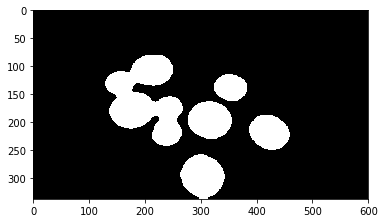

In [82]:
sampleCoinGray = cv2.blur(sampleCoinGray,(15,15))
_,thresholdCoinImage = cv2.threshold(sampleCoinGray,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresholdCoinImage, cmap='gray')
plt.show()

In [83]:
def openAndCloseMorph(kernelSizeOpen,kernelSizeClose,kernelShapeOpen,kernelShapeClose, mode):
    kernel_open = cv2.getStructuringElement(kernelShapeOpen,(kernelSizeOpen,kernelSizeOpen))
    kernel_close = cv2.getStructuringElement(kernelShapeClose,(kernelSizeClose,kernelSizeClose))

    outputImage = thresholdCoinImage.copy()
    
    if (mode == 'open first'):
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_OPEN, kernel_open)
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_CLOSE, kernel_close)
    else:
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_CLOSE, kernel_close)
        outputImage = cv2.morphologyEx(outputImage, cv2.MORPH_OPEN, kernel_open)
    plt.figure(figsize=(5,5))
    plt.imshow(outputImage, cmap='gray')
    plt.show()
    
interact(openAndCloseMorph, kernelSizeOpen=widgets.IntSlider(min=1,max=21,step=1,value=1),
         kernelSizeClose=widgets.IntSlider(min=1,max=21,step=1,value=1),
         kernelShapeOpen=widgets.Dropdown(
                        options=[cv2.MORPH_RECT,cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS],
                        value=cv2.MORPH_RECT,
                        description='kernelShape:',
                        disabled=False),
         kernelShapeClose=widgets.Dropdown(
                        options=[cv2.MORPH_RECT,cv2.MORPH_ELLIPSE, cv2.MORPH_CROSS],
                        value=cv2.MORPH_RECT,
                        description='kernelShape:',
                        disabled=False),
        mode=widgets.Dropdown(
                        options=['close first','open first'],
                        value='open first',
                        description='mode:',
                        disabled=False)
);

interactive(children=(IntSlider(value=1, description='kernelSizeOpen', max=21, min=1), IntSlider(value=1, desc…

We then apply <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga8a0b7fdfcb7a13dde018988ba3a43042">distance transform</a> to the thresholding output. Distance transform calculates the approximate or precise distance from every binary image pixel to the nearest zero pixel

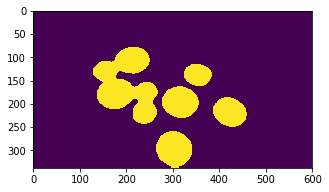

after openning


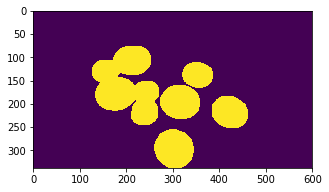

after dilating: sure background


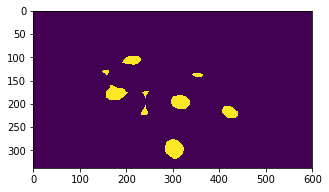

sure foreground


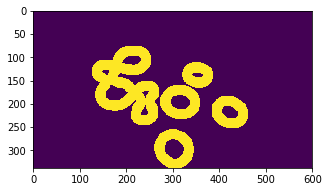

unknown


In [106]:
kernel_open = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))
kernel_close = cv2.getStructuringElement(cv2.MORPH_RECT,(41,41))

kernel = np.ones((3,3),np.uint8) #used for dilation
extreme_kernel = np.ones((15,15),np.uint8) #used for extreme dilation
openning = cv2.morphologyEx(thresholdCoinImage,cv2.MORPH_OPEN,kernel, iterations = 2)
imshow(openning,(5,5))
print("after openning")
sure_bg = cv2.dilate(openning,kernel,iterations=3)
imshow(sure_bg,(5,5))
print("after dilating: sure background")

distanceTransformOutput = cv2.distanceTransform(openning,cv2.DIST_L2,3)
_, sure_fg = cv2.threshold(distanceTransformOutput,0.5*distanceTransformOutput.max(),255,0)
roughMarkerPixel = np.uint8(sure_fg)
imshow(sure_fg,(5,5))
print("sure foreground")

unknown = sure_bg - sure_fg
imshow(unknown,(5,5))
print("unknown")

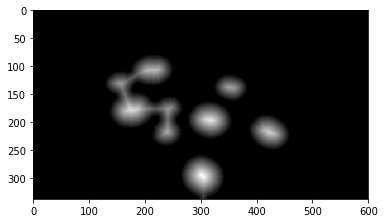

In [107]:
distanceTransformOutput = cv2.distanceTransform(thresholdCoinImage,cv2.DIST_L2,3)
plt.imshow(distanceTransformOutput,cmap='gray')
plt.show()

Pick only pixel which is greater than 45% of max distance as potential coin markers.

Max Distance: 36.556812


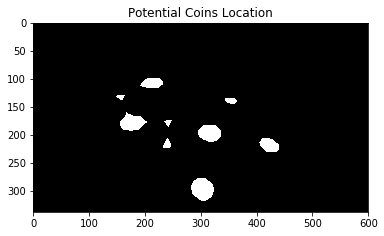

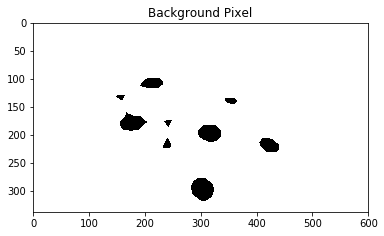

In [108]:
maxDistance = np.max(distanceTransformOutput)
print('Max Distance:',maxDistance)
roughMarkerPixel = np.uint8(distanceTransformOutput > 0.50 * maxDistance)
backgroundMask = np.invert(roughMarkerPixel)

plt.title('Potential Coins Location')
plt.imshow(roughMarkerPixel, cmap='gray')
plt.show()

plt.figure()
plt.title('Background Pixel')
plt.imshow(backgroundMask, cmap='gray')
plt.show()

Labeling each connected component with its unique label number by using <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#gaedef8c7340499ca391d459122e51bef5">cv2.connectedComponents</a>.

[0 1 2 3 4 5 6 7 8 9]
Min Label: 0 Max Label: 10
[ 0  1  2  3  4  5  6  7  8  9 10]


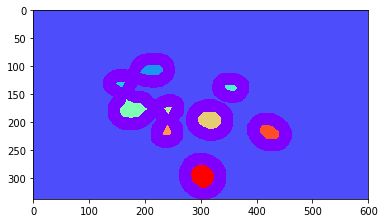

In [109]:
_, markers = cv2.connectedComponents(np.uint8(sure_fg))
print(np.unique(markers))
# Add 1 to make the marker label start with 1
markers = markers+1
# markers = markers

# Mark background pixel with 0
markers[np.where(unknown==255)] = 0
print('Min Label:',np.min(markers),'Max Label:',np.max(markers))
print(np.unique(markers))

plt.imshow(markers,cmap='rainbow')
plt.show()

Apply <a href="https://docs.opencv.org/3.4.2/d7/d1b/group__imgproc__misc.html#ga3267243e4d3f95165d55a618c65ac6e1">watershed algorithm</a> using created marker and input coins image. Is there any missing coin? Why? Fix the bug and state your instruction in below block.

In [110]:
'''
How to find the missing coin?

'''

'\nHow to find the missing coin?\n\n'

[-1  1  2  3  4  5  6  7  8  9 10]
Min Label: -1 Max Label: 10


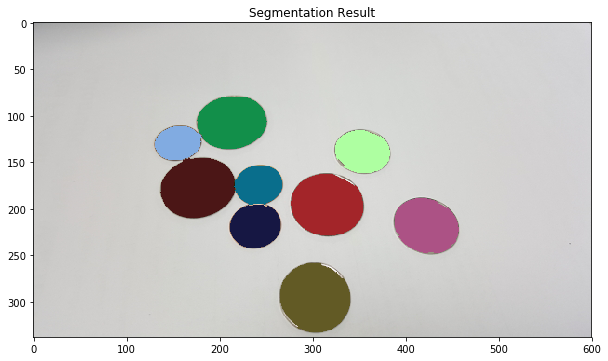

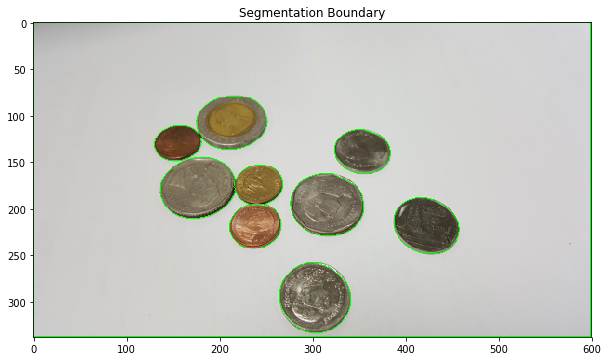

In [112]:
outputImage = sampleCoinImage.copy()
borderImage = sampleCoinImage.copy()
markers = cv2.watershed(outputImage,markers)
print(np.unique(markers))

# -1 is border pixel  
print('Min Label:',np.min(markers),'Max Label:',np.max(markers))

# 1 is background 
color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
outputImage[np.where(markers == 0)] = color

for outputMarkerIdx in range(2,np.max(markers+1)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    outputImage[np.where(markers == outputMarkerIdx)] = color
outputImage = cv2.cvtColor(outputImage,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10))
plt.title('Segmentation Result')
plt.imshow(outputImage)
plt.show()

borderImage[np.where(markers == -1)] = (0,255,0)
borderImage = cv2.cvtColor(borderImage,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.title('Segmentation Boundary')
plt.imshow(borderImage)
plt.show()

In [520]:
def perspective_transform(input_img, diagonal_sheer=0):
    sh_inc = 11/10 #increased part of sheer
    sh_dec = 9/10 #decreased part of sheer
    x1 = 0
    x2 = input_img.shape[1]
    y1 = 0
    y2 = input_img.shape[0]
    ideal_length = max(x2,y2)
#     pts1 = np.float32([(y1,x1),(y1,x2),(y2,x1),(y2,x2)])
    if diagonal_sheer == 0:
        pts1 = np.float32([(x1,y1),(x1,y2),(x2,y1),(x2,y2)])
    if diagonal_sheer == 1 or diagonal_sheer == 2:
        pts1 = np.float32([(x1,y1),(x1*sh_inc,y2*sh_dec),(x2*sh_dec,y1*sh_inc),(x2,y2)])
        if diagonal_sheer == 2:
            input_img = cv2.flip( input_img, 0 )
    pts2 = np.float32([(0,0),(0,ideal_length),(ideal_length,0),(ideal_length,ideal_length)])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(input_img,M,(ideal_length,ideal_length))
    return dst, ideal_length

In [521]:
def detect_circle(input_img, diagonal_sheer=0):
    dst, ideal_length = transform(input_img, diagonal_sheer)
#####    imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB),(2,2))
    
#     th = cv2.adaptiveThreshold(cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY),255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
    th = cv2.adaptiveThreshold(cv2.cvtColor(dst,cv2.COLOR_BGR2GRAY),255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
#     imshow(th,(5,5))
    
    edges = cv2.Canny(th,30,200)
#     imshow(edges,(5,5))
    circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,35,param1=50,param2=30,\
                               minRadius=int(ideal_length/2 - ideal_length/7),maxRadius=int(ideal_length/2))

    print(circles)
    dst_tmp = dst.copy()
    if(type(circles) == type(None)): return dst,None
    for i in circles[0,:]:
        # draw the outer circle
        cv2.circle(dst_tmp,(i[0],i[1]),i[2],(0,255,0),1)
        # draw the center of the circle
        cv2.circle(dst_tmp,(i[0],i[1]),2,(0,0,255),1)
    imshow(cv2.cvtColor(dst_tmp,cv2.COLOR_BGR2RGB),(2,2))
    return dst, circles[0,:]

In [522]:
def find_circle(coin):
    dst,circles = detect_circle(coin, diagonal_sheer=0)
    if type(circles) == type(None):
        dst,circles = detect_circle(coin, diagonal_sheer=1)
        if type(circles) == type(None):
            dst,circles = detect_circle(coin, diagonal_sheer=2)
            if type(circles) == type(None):
                print("CIRCLES NOT FOUND")
                return None, None
    return dst,circles
    

In [523]:
yellow_hsv = []
bronze_hsv = []
silver_hsv = []
ten_hsv = []
standard_radius = 0

In [524]:
def extract_coin_feature(coin):
    coin, circles = find_circle(coin)
    if type(coin) == type(None):
        return None,None
    circle = np.uint8(circles[0])
    center = (circle[0],circle[1])
    radius = circle[2]
    margin = radius * 5/100
    square_shape = int(radius / 1.414 - margin)
    print('center: ',center)
    print('radius: ',radius)
    crop = coin[(center[0]) - square_shape : center[0] + square_shape, center[1] - square_shape : center[1] + square_shape]
    crop = cv2.cvtColor(crop,cv2.COLOR_BGR2HSV)
    imshow(cv2.cvtColor(crop,cv2.COLOR_HSV2RGB),(2,2))
    return crop, radius

In [525]:
def learn_coin_feature(coin, value):
    crop, radius = extract_coin_feature(coin)
    h = np.average(crop[:,:,0])
    s = np.average(crop[:,:,1])
    v = np.average(crop[:,:,2])
    
    if value == 0.25:
        global yellow_hsv
        yellow_hsv = [h,s,v]
        print("yellow: ", yellow_hsv)
    if value == 0.5:
        global bronze_hsv
        bronze_hsv = [h,s,v]
        print("bronze: ", bronze_hsv)
    if value == 1:
        global silver_hsv,standard_radius
        silver_hsv = [h,s,v]
        standard_radius = radius
        print("silver: ",silver_hsv)
        print("standard radius: ",standard_radius)
    if value == 10:
        global ten_hsv
        ten_hsv = [h,s,v]
        print("ten: ",ten_hsv)

In [526]:
def learn_coin_from_mark(mark, value):
    margin = 5
    marked_pic = np.zeros((sampleCoinGray.shape))
    marked_pic[markers == mark] = 255
    #     print((np.uint8(marked_pic)))
    _, rbcContours, _ = cv2.findContours(np.uint8(marked_pic), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(rbcContours[0])
    print(x,y,w,h)
    coin = sampleCoinImage[max(y-margin,0):min(h+y+margin,sampleCoinGray.shape[0]),max(x-margin,0):min(sampleCoinGray.shape[1],w+x+margin)]
    learn_coin_feature(coin,value)


325 116 59 46
None
[[[37.5 35.5 29. ]]]


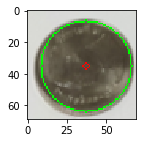

center:  (37, 35)
radius:  29


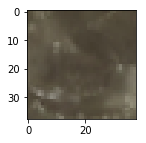

silver:  [20.373961218836566, 64.96606648199446, 89.38434903047091]
standard radius:  29
212 196 54 46
None
None
[[[33.5 34.5 29.2]]]


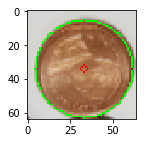

center:  (33, 34)
radius:  29


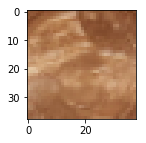

bronze:  [12.702216066481995, 134.84626038781164, 170.42936288088643]
216 154 52 42
None
None
[[[34.5 31.5 27.1]]]


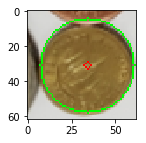

center:  (34, 31)
radius:  27


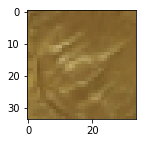

yellow:  [19.80190311418685, 157.43425605536333, 138.2984429065744]
176 80 76 56
[[[42.5 40.5 36.8]]]


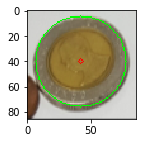

center:  (42, 40)
radius:  36


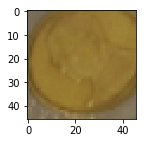

ten:  [20.766068052930056, 155.26937618147448, 140.3156899810964]


In [527]:
learn_coin_from_mark(4,1)
learn_coin_from_mark(8,0.5)
learn_coin_from_mark(6,0.25)
learn_coin_from_mark(2,10)

In [548]:
print('silver: ',silver_hsv)
print('yellow: ',yellow_hsv)
print('bronze: ',bronze_hsv)

silver:  [20, 64, 89]
yellow:  [19, 157, 138]
bronze:  [12, 134, 170]


In [558]:
def identify_coin(coin):
    VAL_MARGIN = 200
    HUE_MARGIN = 5
    SAT_MARGIN = 10
    RADIUS_MARGIN = 0.1
    
    global yellow_hsv,bronze_hsv,silver_hsv,ten_hsv
    yellow_hsv = [int(i) for i in yellow_hsv]
    bronze_hsv = [int(i) for i in bronze_hsv]
    silver_hsv = [int(i) for i in silver_hsv]
    ten_hsv = [int(i) for i in ten_hsv]
    
    color = None
    
    #extract feature
    crop, radius = extract_coin_feature(coin)
    if type(crop) == type(None): return 0
    h = int(np.average(crop[:,:,0]))
    s = int(np.average(crop[:,:,1]))
    v = int(np.average(crop[:,:,2]))
    
    #check color
    if (h in range (yellow_hsv[0]-HUE_MARGIN,yellow_hsv[0]+HUE_MARGIN)\
           and (s in range (yellow_hsv[1]-SAT_MARGIN,yellow_hsv[1]+SAT_MARGIN))\
           and (v in range (yellow_hsv[2]-VAL_MARGIN,yellow_hsv[2]+VAL_MARGIN))):
        color = "yellow"
    elif (h in range (bronze_hsv[0]-HUE_MARGIN,yellow_hsv[0]+HUE_MARGIN)\
           and (s in range (bronze_hsv[1]-SAT_MARGIN,yellow_hsv[1]+SAT_MARGIN))\
           and (v in range (bronze_hsv[2]-VAL_MARGIN,bronze_hsv[2]+VAL_MARGIN))):
        color = "bronze"
    elif (h in range (silver_hsv[0]-HUE_MARGIN,silver_hsv[0]+HUE_MARGIN)\
           and (s in range (silver_hsv[1]-SAT_MARGIN,silver_hsv[1]+SAT_MARGIN))\
           and (v in range (silver_hsv[2]-VAL_MARGIN,silver_hsv[2]+VAL_MARGIN))):
        color = "silver"
    elif (h in range (ten_hsv[0]-HUE_MARGIN,ten_hsv[0]+HUE_MARGIN)\
           and (s in range (ten_hsv[1]-SAT_MARGIN,ten_hsv[1]+SAT_MARGIN))\
           and (v in range (ten_hsv[2]-VAL_MARGIN,ten_hsv[2]+VAL_MARGIN))):
        color = "ten"
    print("color: ",color)
    #check size then color
    if(radius > standard_radius + standard_radius * RADIUS_MARGIN):
        # THIS CAN BE 2 OR 5 OR 10 OR NONE
        
        if(color == "yellow"):
            # CAN BE 2 OR 10
            # FIND INNER CIRCLE
            coin_transformed,_ = find_circle(coin)
            coin_hsv = cv2.cvtColor(coin_transformed,cv2.COLOR_BGR2HSV)
            imshow(coin_hsv,(2,2))
            th = cv2.adaptiveThreshold(cv2.cvtColor(coin_hsv,cv2.COLOR_BGR2GRAY),\
                                    255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
            edges = cv2.Canny(th,30,200)
            circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=20,\
                                       minRadius=int(radius*3/5),maxRadius=int(radius * 4/5))
            if(type(circles) == type(None)):
                # NO INNER CIRCLE, MUST BE 2
                return 2
            else:
                for i in circles[0,:]:
                    cv2.circle(coin_transformed,(i[0],i[1]),i[2],(0,255,0),1)
                    cv2.circle(coin_transformed,(i[0],i[1]),2,(0,0,255),1)
                print("smaller circles:")
                imshow(cv2.cvtColor(coin_transformed,cv2.COLOR_BGR2RGB),(2,2))       
                return 10
        if(color == "silver"): return 5
        else: return 0
    else:
        if(color == "yellow"): return 0.25
        if(color == "bronze"): return 0.5
        if(color == "silver"): return 1
        else: return 0


176 80 76 56
Marker:  2
[[[42.5 40.5 36.8]]]


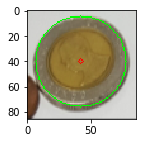

center:  (42, 40)
radius:  36


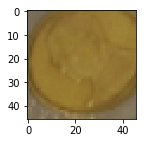

color:  yellow
[[[42.5 40.5 36.8]]]


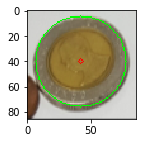

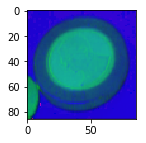

smaller circles:


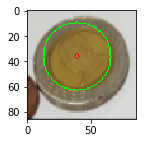

Value:  10
131 112 51 36
Marker:  3
None
None
[[[30.5 30.5 26.1]]]


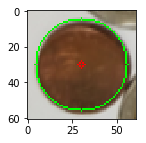

center:  (30, 30)
radius:  26


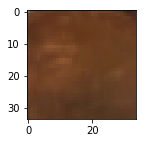

color:  None
Value:  0
325 116 59 46
Marker:  4
None
[[[37.5 35.5 29. ]]]


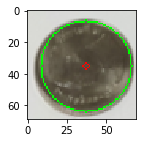

center:  (37, 35)
radius:  29


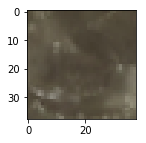

color:  silver
Value:  1
137 146 80 64
Marker:  5
[[[45.5 43.5 40. ]]]


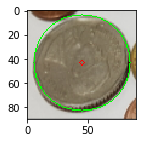

center:  (45, 43)
radius:  40


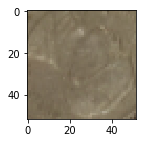

color:  silver
Value:  5
216 154 52 42
Marker:  6
None
None
[[[34.5 31.5 27.1]]]


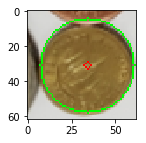

center:  (34, 31)
radius:  27


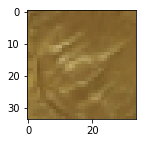

color:  yellow
Value:  0.25
277 163 78 66
Marker:  7
[[[44.5 43.5 40.1]]]


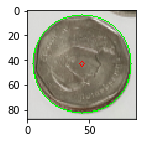

center:  (44, 43)
radius:  40


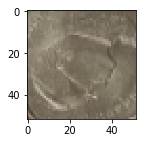

color:  None
Value:  0
212 196 54 46
Marker:  8
None
None
[[[33.5 34.5 29.2]]]


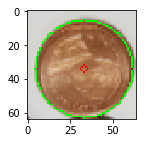

center:  (33, 34)
radius:  29


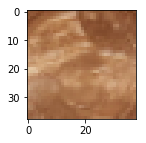

color:  bronze
Value:  0.5
389 189 69 59
Marker:  9
None
None
None
CIRCLES NOT FOUND
Value:  0
266 259 75 74
Marker:  10
[[[42.5 42.5 38.8]]]


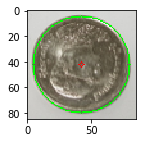

center:  (42, 42)
radius:  38


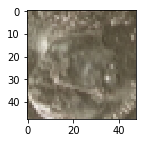

color:  silver
Value:  5


In [559]:
#create contour for each bounding box
coins = np.unique(markers)
for i in coins:
    margin = 5
    if i == -1 or i == 1: continue
    marked_pic = np.zeros((sampleCoinGray.shape))
    marked_pic[markers == i] = 255
#     print((np.uint8(marked_pic)))
    _, rbcContours, _ = cv2.findContours(np.uint8(marked_pic), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(rbcContours[0])
    print(x,y,w,h)
    coin = sampleCoinImage[max(y-margin,0):min(h+y+margin,sampleCoinGray.shape[0]),max(x-margin,0):min(sampleCoinGray.shape[1],w+x+margin)]
    print("Marker: ", i)
    value = identify_coin(coin)
    print("Value: ",value)
#     perspective_transform(coin,diagonal_sheer=2)


#### Assignment 2 - Coin Counter

From the above section, we can gracefully segment overlpping coins! Your today task is to implement a program to count total coin value from test images provided in assets folder. Please include two of your own test images by using smartphone camera. The images should show robustness of your designed alogorithm such as overlapping coins, tilt camera angle or shadow handling. (Optional) You will get extra points if you can use <b>same parameters</b> for all test images. Don't forget to show your work in step in below block.

<b>Remark : </b>
- There are eight test images in assets folder. Please hand in the recognition result in image files. 
- You must not count Yen Coin!!!

<b>Basic Guidance:<b>
1. Segment each coin into individual connected component and find the bounding box which can enclose those connect components by <a href="https://docs.opencv.org/3.4.2/d3/dc0/group__imgproc__shape.html#gacb413ddce8e48ff3ca61ed7cf626a366">cv2.boundingRect</a>
2. For each component, extract <b>useful features</b> (you have to design this by youself).
3. Classify those components into Thai Coin classes.  

<b>Hints:</b>
- How do to discard noise/fill small hole from segmentation mask output?
- From the beginning of this class, you had learned many potential image features, such as edge, color, contour and shape. Use them wisely.
- Internet is your friend. You can search for relavent research papers and use their algorithm, but you must <b>give proper credits</b> by citing them in this notebook. 

In [ ]:
### Describe how your algorithm work here (Thai or English). You can provide any visualization if you want.
'''
1. ..
2. ..
..
'''

In [ ]:
### FILL HERE ###